<a href="https://colab.research.google.com/github/sSteam-cube/P_345-P_343-Laboratory-Resources/blob/main/Balmer_Series/Balmer_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def least_squares_analysis(y_values, x_values=None, title="Least Squares Analysis",
                           xlabel="x-axis", ylabel="y-axis", show_table=True):
    """
    Perform least squares regression, show a plot with regression results,
    and optionally display the calculation table below.

    Parameters
    ----------
    y_values : list or array
        Dependent variable values (y).
    x_values : list or array, optional
        Independent variable values (x). If None, uses 1, 2, ..., N.
    title : str, optional
        Title of the plot.
    xlabel : str, optional
        Label for the x-axis.
    ylabel : str, optional
        Label for the y-axis.
    show_table : bool, optional
        If True (default), displays the calculations table below the plot.
        If False, only the plot is shown.
    """

    # --- 1. Calculations ---
    # Convert to numpy arrays
    y = np.array(y_values, dtype=float)
    if x_values is None:
        x = np.arange(1, len(y) + 1, dtype=float)
    else:
        x = np.array(x_values, dtype=float)

    # Perform least-squares fit: y = m*x + c
    A = np.vstack([x, np.ones(len(x))]).T
    slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]

    # Fitted values and residuals
    y_fit = slope * x + intercept
    residuals = y - y_fit

    # Error estimates for slope and intercept
    N = len(x)
    if N > 2:
        Sxx = np.sum((x - np.mean(x))**2)
        sigma_y = np.sqrt(np.sum(residuals**2) / (N - 2))
        err_slope = sigma_y / np.sqrt(Sxx)
        err_intercept = sigma_y * np.sqrt(1/N + (np.mean(x)**2)/Sxx)
        fit_label = (
            r"$y = ({:.4f} \pm {:.4f})x + ({:.4f} \pm {:.4f})$"
            .format(slope, err_slope, intercept, err_intercept)
        )
    else:
        err_slope, err_intercept = np.nan, np.nan
        fit_label = r"$y = {:.4f}x + {:.4f}$".format(slope, intercept)


    # Create DataFrame for the results table
    df = pd.DataFrame({
        "x": x,
        "y": y,
        "x²": x**2,
        "xy": x * y
    })
    totals = pd.DataFrame({
        "x": [np.sum(x)],
        "y": [np.sum(y)],
        "x²": [np.sum(x**2)],
        "xy": [np.sum(x*y)]
    }, index=["Σ"])
    table = pd.concat([df, totals])


    # --- 2. Figure Generation ---
    if show_table:
        # Combined Figure: Plot + Table
        fig, (ax1, ax2) = plt.subplots(
            nrows=2, ncols=1, figsize=(10, 9),
            gridspec_kw={"height_ratios": [3, 1]}
        )
        fig.suptitle(title, fontsize=16)

        # Top: Regression plot
        ax = ax1
        ax.scatter(x, y, color='blue', label="Data points")
        ax.plot(x, y_fit, color='red')
        ax.plot([], [], ' ', label=fit_label) # dummy plot for legend text
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.legend()
        ax.grid(True)

        # Bottom: Table
        ax2.axis("off")
        table_fig = ax2.table(cellText=table.round(3).values,
                              colLabels=table.columns,
                              rowLabels=table.index,
                              cellLoc='center', loc='center')
        table_fig.auto_set_font_size(False)
        table_fig.set_fontsize(10)
        table_fig.scale(1.3, 1.3)
    else:
        # Figure with only the plot
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.scatter(x, y, color='blue', label="Data points")
        ax.plot(x, y_fit, color='red')
        ax.plot([], [], ' ', label=fit_label) # dummy plot for legend text
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

    # --- 3. Return results ---
    return {
        "slope": slope,
        "intercept": intercept,
        "slope_error": err_slope,
        "intercept_error": err_intercept,
        "table": table
    }

# Example usage:
# some_y_values = [1.1, 2.3, 2.9, 4.2, 5.1]
# some_x_values = [1, 2, 3, 4, 5]
#
# # With the table
# least_squares_analysis(some_y_values, some_x_values, title="My Experiment",
#                        xlabel="Time (s)", ylabel="Distance (m)", show_table=True)
#
# # Without the table
# least_squares_analysis(some_y_values, some_x_values, title="My Experiment (Plot Only)",
#                        xlabel="Time (s)", ylabel="Distance (m)", show_table=False)

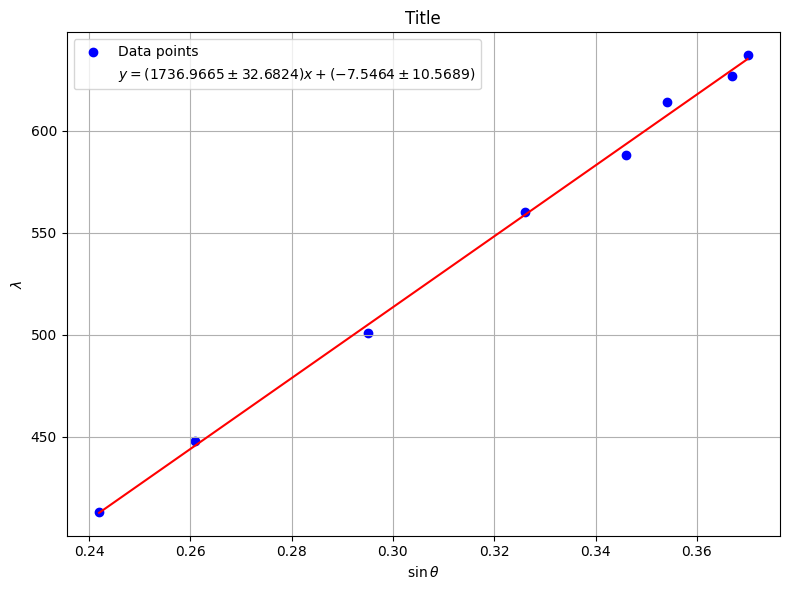

{'slope': np.float64(1736.9664889849773),
 'intercept': np.float64(-7.546397286316001),
 'slope_error': np.float64(32.68244749760498),
 'intercept_error': np.float64(10.568913067623486),
 'table':        x       y        x²        xy
 0  0.242   413.0  0.058564    99.946
 1  0.261   448.0  0.068121   116.928
 2  0.295   501.0  0.087025   147.795
 3  0.326   560.0  0.106276   182.560
 4  0.346   588.0  0.119716   203.448
 5  0.354   614.0  0.125316   217.356
 6  0.367   627.0  0.134689   230.109
 7  0.370   637.0  0.136900   235.690
 Σ  2.561  4388.0  0.836607  1433.832}

In [3]:
calculated_values = [0.242, 0.261, 0.295, 0.326, 0.346, 0.354, 0.367, 0.370]
wavelengths_nm = [413, 448, 501, 560, 588, 614, 627, 637]

least_squares_analysis(wavelengths_nm, calculated_values, 'Title', r'$\sin\theta$', r'$\lambda$', False)

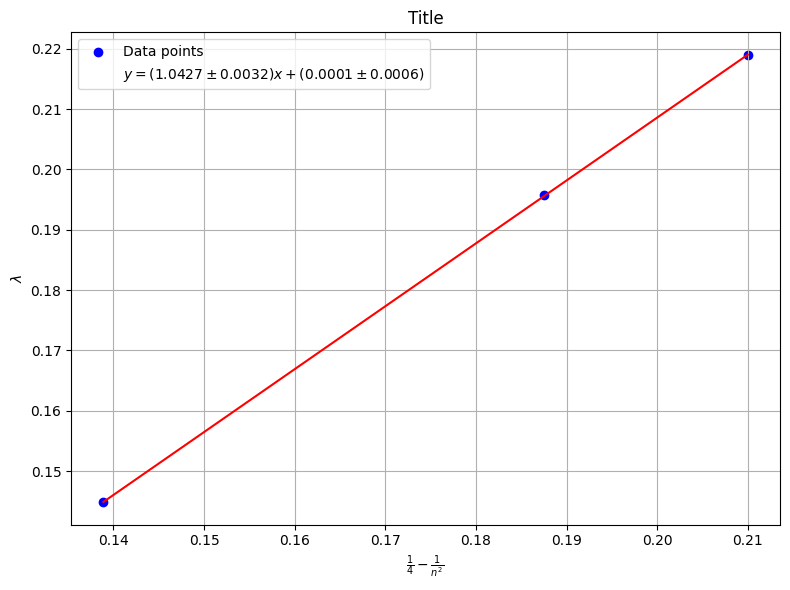

{'slope': np.float64(1.0426595489754384),
 'intercept': np.float64(6.709867770448793e-05),
 'slope_error': np.float64(0.0031502103645964937),
 'intercept_error': np.float64(0.0005709515444107185),
 'table':           x         y        x²        xy
 0  0.138889  0.144840  0.019290  0.020117
 1  0.187500  0.195695  0.035156  0.036693
 2  0.210000  0.218937  0.044100  0.045977
 Σ  0.536389  0.559472  0.098546  0.102786}

In [17]:
wavelength = np.array([690.417, 510.999, 456.752])
x = [(1/4 - 1/n**2) for n in range(3, 6)]
least_squares_analysis((wavelength**-1)*1e2, x, 'Title', r'$\frac{1}{4}-\frac{1}{n^2}$', r'$\lambda$', False)
